In [1]:
# allows to import own functions
import sys
import os
path_name = os.getcwd()
root_project = os.path.split(path_name)[0]
sys.path.append(root_project)

from src.models.sir_model import sir_model
from src.utils.help_func import construct_dataframe

from matplotlib.ticker import PercentFormatter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()
%matplotlib inline

In [2]:
OD = np.load('../data/interim/od_matrix.npy')
# OD = np.zeros(OD.shape)
df_countries = pd.read_pickle('../data/interim/country_info_final.pickle')

In [3]:
df_countries.sort_values(by='departures')

,country_name,country_code,total_pop,arrivals,departures,latitude,longitude,arrivals/total,departures/total,arrivals/population,departures/population,continent_name,continent_code,departures/day
190,Tuvalu,TUV,1.164600e+04,2700.0,2100.0,-8.00,178.0000,0.000002,0.000001,0.231839,0.180319,Oceania,OC,{'FJI': 6}
4,Angola,AGO,3.080976e+07,218000.0,3000.0,-12.50,18.5000,0.000149,0.000002,0.007076,0.000097,Africa,AF,"{'COD': 0, 'FRA': 2, 'MAR': 0, 'GBR': 1, 'COG'..."
144,Palau,PLW,1.800800e+04,106000.0,9000.0,7.50,134.5000,0.000072,0.000006,5.886273,0.499778,Oceania,OC,"{'JPN': 14, 'KOR': 7, 'GUM': 1, 'PHL': 3, 'FSM..."
137,Niger,NER,2.244295e+07,157000.0,10000.0,16.00,8.0000,0.000107,0.000007,0.006996,0.000446,Africa,AF,"{'BFA': 0, 'FRA': 22, 'DZA': 1, 'MAR': 3, 'NGA..."
198,Vanuatu,VUT,2.926800e+05,116000.0,29000.0,-16.00,167.0000,0.000079,0.000020,0.396337,0.099084,Oceania,OC,"{'SLB': 0, 'FJI': 5, 'AUS': 53, 'NZL': 21, 'NC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,United Kingdom,GBR,6.648899e+07,36316000.0,70386000.0,54.00,-2.0000,0.024773,0.049362,0.546196,1.058611,Europe,EU,"{'CHE': 1630, 'SLE': 9, 'MAR': 1933, 'DEU': 61..."
83,"Hong Kong SAR, China",HKG,7.451000e+06,29263000.0,92214000.0,22.25,114.1667,0.019962,0.064669,3.927392,12.376057,Asia,AS,"{'SGP': 4830, 'CHN': 20706, 'PHL': 2360, 'KOR'..."
195,United States,USA,3.271674e+08,79745920.0,92564000.0,38.00,-97.0000,0.054399,0.064915,0.243747,0.282925,North America,NaN,"{'BHS': 423, 'ARG': 1797, 'DOM': 1700, 'MEX': ..."
70,Germany,DEU,8.292792e+07,38881000.0,108542000.0,51.00,9.0000,0.026523,0.076120,0.468853,1.308872,Europe,EU,"{'CHE': 2506, 'ITA': 14888, 'HRV': 4025, 'MAR'..."


In [4]:
df_countries.iloc[170]

country_name                                                         Spain
country_code                                                           ESP
total_pop                                                      4.67237e+07
arrivals                                                        8.2773e+07
departures                                                      1.9116e+07
latitude                                                                40
longitude                                                               -4
arrivals/total                                                   0.0564634
departures/total                                                  0.013406
arrivals/population                                                1.77154
departures/population                                             0.409128
continent_name                                                      Europe
continent_code                                                          EU
departures/day           

In [5]:
df_countries.loc[df_countries['country_code'] == 'NER']['departures/day'].item()

{'BFA': 0,
 'FRA': 22,
 'DZA': 1,
 'MAR': 3,
 'NGA': 1,
 'ETH': 0,
 'BEN': 0,
 'TCD': 0}

In [6]:
OD[170,:].sum()

52375.0

In [7]:
df_countries.loc[df_countries['country_code'] == 'NER', 'departures'].item() / 365

27.397260273972602

He comprobado que la matriz origen-destino corresponde con el numero de departures, desde españa.

In [8]:
# R0 = 2
# Tr = 10
# omega = 0.01
# initial_country = 'USA'
# initial_infected = 1
# T = 1000
# output_mode = 1

# output_1 = sir_model(df_countries, OD, R0, Tr, omega, initial_country, initial_infected, T, output_mode)

In [9]:
R0 = 2
Tr = 20
omega = 0.01
initial_country = 'ESP'
initial_infected = 1
limit_deaths = 100
n_closed= 5
react_time= 20
T=730
output_mode=1

# OD = np.zeros(OD.shape)

output_1 = sir_model(df_countries, OD, R0, Tr, omega, initial_country, initial_infected, limit_deaths, n_closed, react_time, T, output_mode)

/disks/hdd2T/Drive/TFM_AGM/src/models/sir_model.py:164: RuntimeWarning: invalid value encountered in true_divide
  new_infected = (beta_v * SIR[:, 0] * SIR[:, 1]) / N_i
/disks/hdd2T/Drive/TFM_AGM/src/models/sir_model.py:176: RuntimeWarning: invalid value encountered in true_divide
  SIR_p = SIR/ SIR.sum(axis=1).reshape(-1, 1)
/disks/hdd2T/Drive/TFM_AGM/src/models/sir_model.py:201: RuntimeWarning: invalid value encountered in true_divide
  SIR_p_t = SIR_t / SIR_t.sum(axis=1)[:, np.newaxis, :]


In [10]:
df = construct_dataframe([output_1], output_mode)
df

,initial_country,idx_country,R0,Tc,Tr,omega,limit_deaths,n_closed,react_time,total_infected,...,new_infected_t,new_infected_global_t,deaths_t,deaths_global_t,new_recovered_t,new_recovered_global_t,SIR_t,SIR_global_t,SIR_p_t,SIR_global_p_t
0,ESP,170,2,10.0,20,0.01,100,5,20,61526583.0,...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[[[37160148.0, 37147910.0, 37135672.0, 3712343...","[[7533159325.0, 7533162946.0, 7533162946.0, 75...","[[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...","[[0.9999999998672535, 0.9999999998672536, 0.99..."


Aqui tengo la población SIR, para cada pais, en cada instante de tiempo.

In [11]:
R0 = df['R0'].item()
total_infected = df['total_infected'].item()
total_death = df['total_death'].item()
total_recovered = df['total_recovered'].item()

idx_country = df['idx_country'].item()
SIR_p_t = df['SIR_p_t'].item()
SIR_t = df['SIR_t'].item()
SIR_global_p_t = df['SIR_global_p_t'].item()
SIR_global_t = df['SIR_global_t'].item()
new_infected_global_t = df['new_infected_global_t'].item()
deaths_global_t = df['deaths_global_t'].item()

print("R0: {}".format(R0))
print("Total infected: {:,.0f}".format(total_infected))
print("Total death: {:,.0f}".format(total_death))
print("Total recovered: {:,.0f}".format(total_recovered))

R0: 2
Total infected: 61,526,583
Total death: 10,252,943
Total recovered: 51,266,066


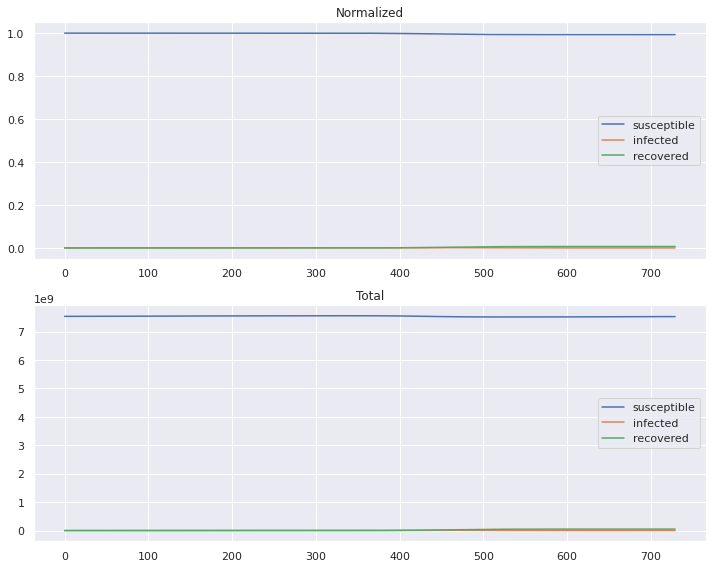

In [12]:
fig, ax = plt.subplots(2, 1, figsize = (10,8))
ax[0].plot(SIR_global_p_t[0,:], label = 'susceptible')
ax[0].plot(SIR_global_p_t[1,:], label = 'infected')
ax[0].plot(SIR_global_p_t[2,:], label = 'recovered')
ax[0].set_title('Normalized')
ax[0].legend()
ax[1].plot(SIR_global_t[0,:], label = 'susceptible')
ax[1].plot(SIR_global_t[1,:], label = 'infected')
ax[1].plot(SIR_global_t[2,:], label = 'recovered')
ax[1].set_title('Total')
ax[1].legend()
plt.tight_layout()

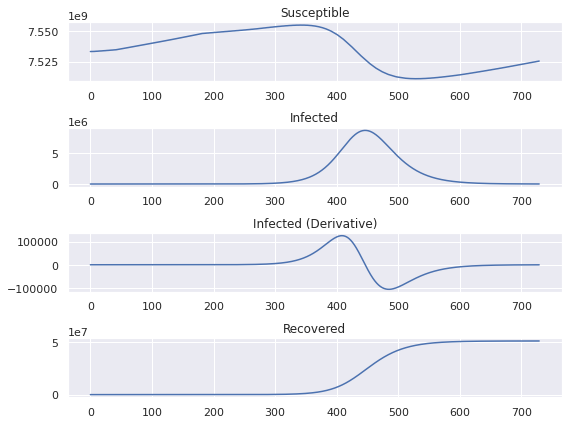

In [13]:
# los tres grupos en detalle en el instante t
fig, ax = plt.subplots(4, 1, figsize = (8,6))
ax[0].plot(SIR_global_t[0,:])
ax[0].set_title('Susceptible')
ax[1].plot(SIR_global_t[1,:])
ax[1].set_title('Infected')
ax[2].plot(np.gradient(SIR_global_t[1,:]))
ax[2].set_title('Infected (Derivative)')
ax[3].plot(SIR_global_t[2,:])
ax[3].set_title('Recovered')
plt.tight_layout()

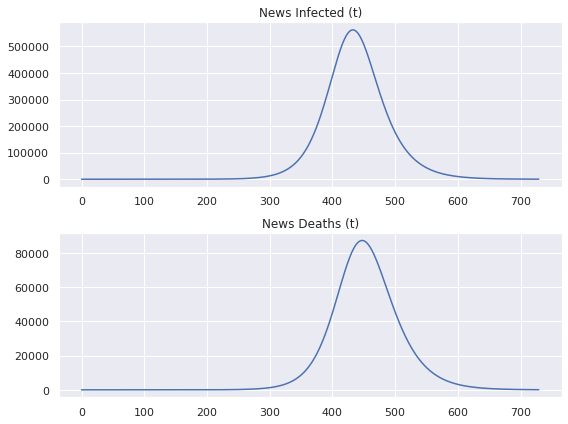

In [14]:
# nuevos infectados y muertos en el instante t
fig, ax = plt.subplots(2, 1, figsize = (8,6))
ax[0].plot(new_infected_global_t)
ax[0].set_title('News Infected (t)')
ax[1].plot(deaths_global_t)
ax[1].set_title('News Deaths (t)')
plt.tight_layout()

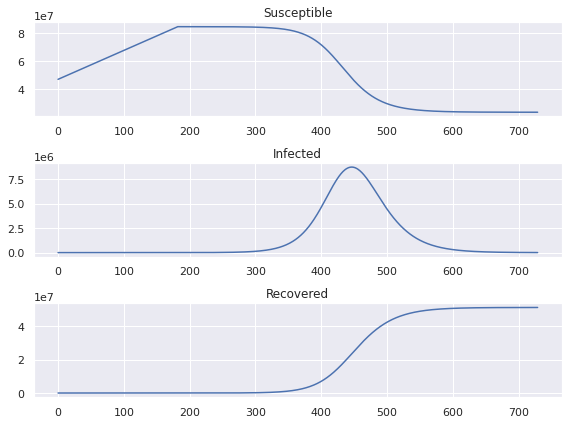

In [15]:
# los tres grupos en detalle en el instante t para el pais de inicio
fig, ax = plt.subplots(3, 1, figsize = (8,6))
ax[0].plot(SIR_t[idx_country,0,:])
ax[0].set_title('Susceptible')
ax[1].plot(SIR_t[idx_country,1,:])
ax[1].set_title('Infected')
ax[2].plot(SIR_t[idx_country,2,:])
ax[2].set_title('Recovered')
plt.tight_layout()

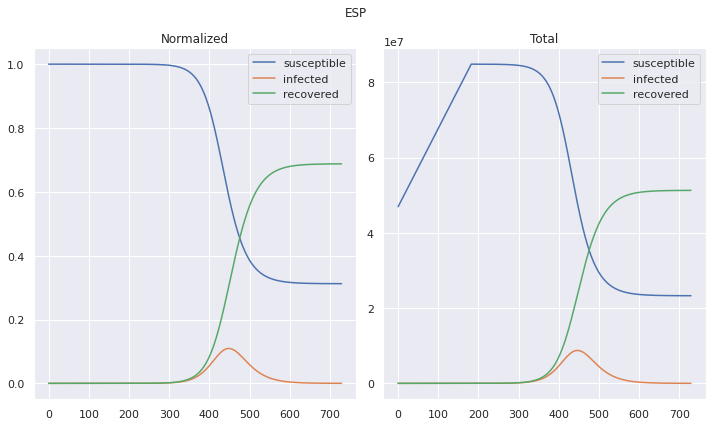

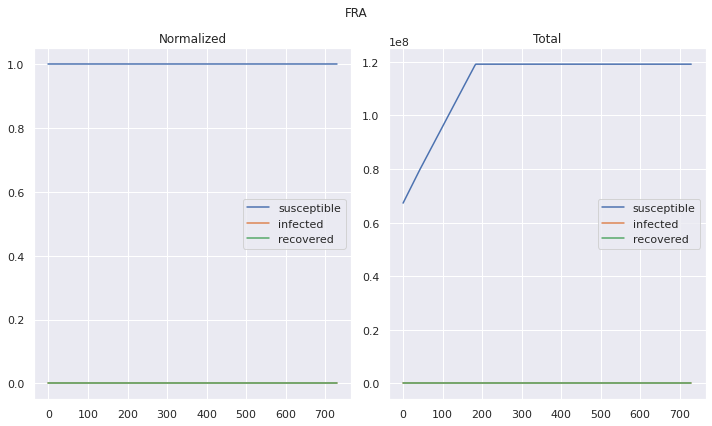

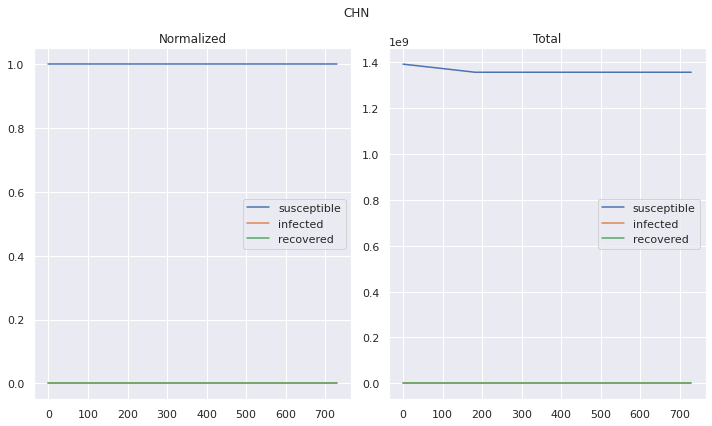

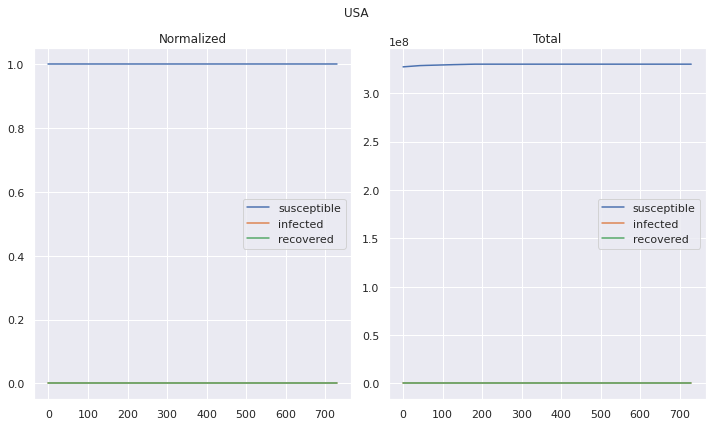

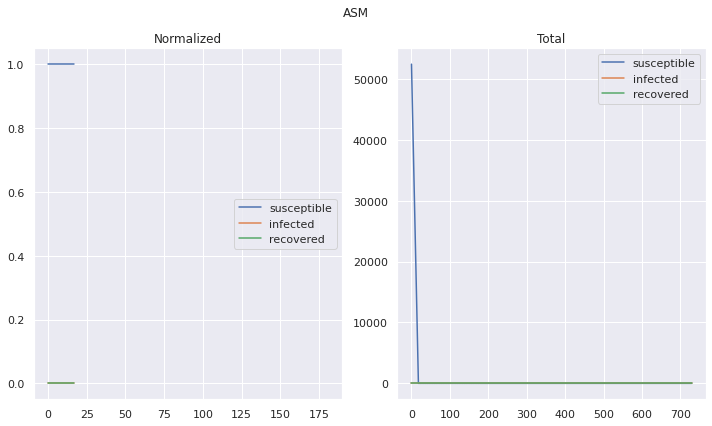

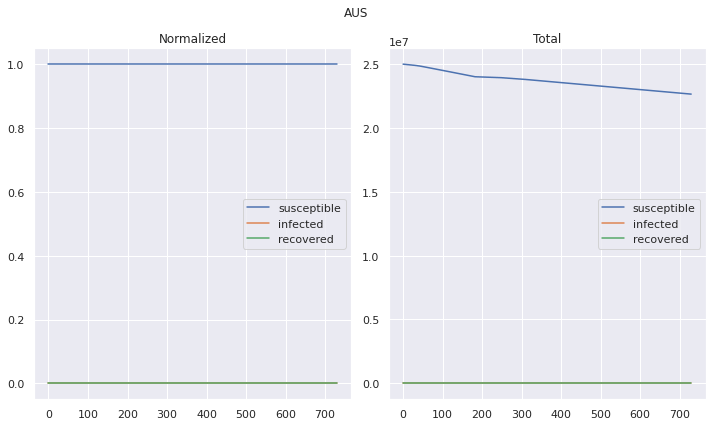

In [16]:
countries = [initial_country, 'FRA', 'CHN', 'USA', 'ASM', 'AUS']
idx = []

for country in countries:
    index = df_countries.loc[df_countries["country_code"] == country].index.item()
    idx.append(index)
    
#idx = [168, 39]  # introduce los indices de los paises a consultar

for i, country in zip(idx, countries):
    fig, ax = plt.subplots(1, 2, figsize = (10,6))
    ax[0].plot(SIR_p_t[i, 0, :], label='susceptible')
    ax[0].plot(SIR_p_t[i, 1, :], label='infected')
    ax[0].plot(SIR_p_t[i, 2, :], label='recovered')
    ax[0].set_title('Normalized')
    ax[0].legend()
    ax[1].plot(SIR_t[i, 0, :], label='susceptible')
    ax[1].plot(SIR_t[i, 1, :], label='infected')
    ax[1].plot(SIR_t[i, 2, :], label='recovered')
    ax[1].set_title('Total')
    ax[1].legend()
    fig.suptitle(country)
    plt.tight_layout()

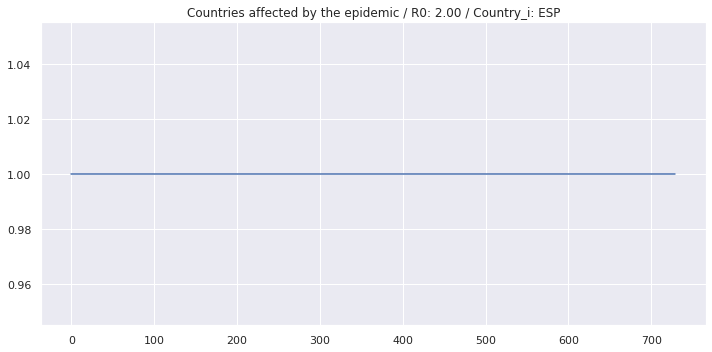

In [17]:
# para ver como evolucionan los paises afectados
affected = []
#for t in range(20,SIR_ncountry_t.shape[2]):
for t in range(T):
    idx = np.argwhere(SIR_t[:,1,t] > 0.99)
    countries = set(df_countries.iloc[idx.flatten().tolist(), 0].values)
    #print('Day {} ->'.format(t), 'Cuntries affected: {}'.format(len(countries)))
    affected.append(len(countries))


fig, ax = plt.subplots(1, 1, figsize = (10,5))
plt.plot(affected)
plt.title('Countries affected by the epidemic / R0: {:.2f} / Country_i: {}'.format(R0, initial_country))
plt.tight_layout()